# GPA Prediction

In [262]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
import warnings
import joblib
from time import time
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Ignore warnings
warnings.filterwarnings('ignore')
print("Importation complete")

Importation complete


In [222]:
# Load the GPA data from year1_gpa.csv
data_path = "/content/year1_gpa.xlsx"  # Adjust the path as needed
gpa_data = pd.read_excel(data_path)
gpa_data.columns

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name',
       'Last modified time', 'Jamb score', 'English', 'Maths', 'Subject 3',
       'Subject 4', 'Subject 5', 'What was your age in Year One', 'Gender',
       'Do you have a disability?', 'Did you attend extra tutorials? ',
       'How would you rate your participation in extracurricular activities (tech, music, partying, fellowship, etc.) in Year One?',
       'How would you rate your class attendance in Year One',
       'How well did you participate in class activities (Assignments, Asking and Answering Questions, Writing Notes....)',
       'Rate your use of extra materials for study in Year One (Youtube, Other books, others).',
       'Morning', 'Afternoon', 'Evening', 'Late Night',
       'How many days per week did you do reading on average in Year One?',
       'On average, How many hours per day was used for personal study in Year One',
       'Did you teach your peers in Year One',
       'How many courses did you

## Data Preprocessing
In the preprocessing stage, we carefully handle the GPA dataset by addressing missing values, performing feature engineering, and ensuring uniform data formatting to prepare it for accurate model training and prediction.

In [223]:
# Dictionary to map old column names to new names
new_column_names = {
    'ID': 'id',
    'Start time': 'start_time',
    'Completion time': 'completion_time',
    'Email': 'email',
    'Name': 'name',
    'Last modified time': 'last_modified_time',
    'Jamb score': 'jamb_score',
    'English': 'english',
    'Maths': 'maths',
    'Subject 3': 'subject_3',
    'Subject 4': 'subject_4',
    'Subject 5': 'subject_5',
    'What was your age in Year One': 'age_in_year_one',
    'Gender': 'gender',
    'Do you have a disability?': 'has_disability',
    'Did you attend extra tutorials?\xa0': 'attended_tutorials',
    'How would you rate your participation in extracurricular activities (tech, music, partying, fellowship, etc.) in Year One?': 'extracurricular_participation',
    'How would you rate your class attendance in Year One': 'class_attendance_rating',
    'How well did you participate in class activities (Assignments, Asking and Answering Questions, Writing Notes....)': 'class_participation_rating',
    'Rate\xa0your use of extra materials for study in Year One (Youtube, Other books, others).': 'used_extra_study_materials',
    'Morning': 'morning_study',
    'Afternoon': 'afternoon_study',
    'Evening': 'evening_study',
    'Late Night': 'late_night_study',
    'How many days per week did you do reading on average in Year One?': 'days_per_week_reading',
    'On average, How many hours per day was used for personal study in Year One': 'hours_per_day_personal_study',
    'Did you teach your peers in Year One': 'taught_peers',
    'How many courses did you offer in Year One?': 'courses_offered',
    'Did you fall sick in Year One? if yes, How many times do you remember (0 if none)': 'times_fell_sick',
    'What was your study mode in Year 1': 'study_mode',
    'Did you study the course your originally applied for?': 'studied_original_course',
    'What was your monthly allowance in Year One?': 'financial_status_rating',
    'Rate the teaching style / method of the lectures received in Year One': 'teaching_style_rating',
    'What type of higher institution did you attend in Year One\n': 'institution_type',
    'What was your CGPA in Year One?': 'cgpa_year_one',
    'What grading system does your school use ( if others, type numbers only)': 'grading_system'
}


# Rename columns using the dictionary
gpa_data.rename(columns=new_column_names, inplace=True)

# Print the DataFrame with updated column names
gpa_data.head()


,id,start_time,completion_time,email,name,last_modified_time,jamb_score,english,maths,subject_3,subject_4,subject_5,age_in_year_one,gender,has_disability,attended_tutorials,extracurricular_participation,class_attendance_rating,class_participation_rating,used_extra_study_materials,morning_study,afternoon_study,evening_study,late_night_study,days_per_week_reading,hours_per_day_personal_study,taught_peers,courses_offered,times_fell_sick,study_mode,studied_original_course,financial_status_rating,teaching_style_rating,institution_type,cgpa_year_one,grading_system
0,2,2023-09-30 09:42:21,2023-09-30 09:43:00,anonymous,NaN,NaN,300,B,A,A,B,B,16,Male,No,Yes,7,10,10,NaN,3,5,5,1,6.0,6.0,"Yes, but just a few times",16 to 20,2,Full Time,Yes,NaN,6,Public (Federal),4.83,5
1,3,2023-09-30 10:06:49,2023-09-30 10:12:07,anonymous,NaN,NaN,313,B,A,A,A,B,17,Male,No,No,1,10,9,NaN,3,2,5,4,7.0,10.0,"Yes, but just a few times",13 to 16,1,Full Time,Yes,NaN,6,Public (Federal),4.80,5
2,4,2023-10-02 07:00:32,2023-10-02 07:13:14,anonymous,NaN,NaN,249,C,B,B,B,C,22,Male,No,No,2,5,2,NaN,3,1,4,4,4.0,8.0,"No, I studied alone",5 to 8,6,Full Time,No,NaN,2,Public (Federal),3.1,5
3,5,2023-10-02 10:47:15,2023-10-02 10:52:56,anonymous,NaN,NaN,213,C,B,B,C,B,17,Female,No,No,3,5,5,NaN,3,1,1,1,2.0,2.0,"No, I studied alone",16 to 20,0,Full Time,No,NaN,1,Public (State),3.33,5
4,6,2023-10-02 10:51:42,2023-10-02 10:53:39,anonymous,NaN,NaN,345,C,A,A,A,A,18,Male,No,Yes,6,4,3,NaN,3,3,4,5,3.0,3.0,"Yes, but just a few times",0 to 4,2,Full Time,Yes,NaN,5,Public (Federal),4.6,5


In [224]:
# List of columns to drop
columns_to_drop = ['start_time', 'completion_time', 'email', 'name', 'last_modified_time']

# Drop the specified columns
gpa_data.drop(columns=columns_to_drop, inplace=True)

# Print the DataFrame after dropping columns
gpa_data.head()

,id,jamb_score,english,maths,subject_3,subject_4,subject_5,age_in_year_one,gender,has_disability,attended_tutorials,extracurricular_participation,class_attendance_rating,class_participation_rating,used_extra_study_materials,morning_study,afternoon_study,evening_study,late_night_study,days_per_week_reading,hours_per_day_personal_study,taught_peers,courses_offered,times_fell_sick,study_mode,studied_original_course,financial_status_rating,teaching_style_rating,institution_type,cgpa_year_one,grading_system
0,2,300,B,A,A,B,B,16,Male,No,Yes,7,10,10,NaN,3,5,5,1,6.0,6.0,"Yes, but just a few times",16 to 20,2,Full Time,Yes,NaN,6,Public (Federal),4.83,5
1,3,313,B,A,A,A,B,17,Male,No,No,1,10,9,NaN,3,2,5,4,7.0,10.0,"Yes, but just a few times",13 to 16,1,Full Time,Yes,NaN,6,Public (Federal),4.80,5
2,4,249,C,B,B,B,C,22,Male,No,No,2,5,2,NaN,3,1,4,4,4.0,8.0,"No, I studied alone",5 to 8,6,Full Time,No,NaN,2,Public (Federal),3.1,5
3,5,213,C,B,B,C,B,17,Female,No,No,3,5,5,NaN,3,1,1,1,2.0,2.0,"No, I studied alone",16 to 20,0,Full Time,No,NaN,1,Public (State),3.33,5
4,6,345,C,A,A,A,A,18,Male,No,Yes,6,4,3,NaN,3,3,4,5,3.0,3.0,"Yes, but just a few times",0 to 4,2,Full Time,Yes,NaN,5,Public (Federal),4.6,5


# Exploratory Data Analysis

In [225]:
gpa_data.info() #summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             131 non-null    int64  
 1   jamb_score                     131 non-null    int64  
 2   english                        131 non-null    object 
 3   maths                          131 non-null    object 
 4   subject_3                      131 non-null    object 
 5   subject_4                      131 non-null    object 
 6   subject_5                      131 non-null    object 
 7   age_in_year_one                131 non-null    int64  
 8   gender                         131 non-null    object 
 9   has_disability                 131 non-null    object 
 10  attended_tutorials             131 non-null    object 
 11  extracurricular_participation  131 non-null    int64  
 12  class_attendance_rating        131 non-null    int

In [226]:
gpa_data.isnull().sum() #to get the columns that have missing values

id                                0
jamb_score                        0
english                           0
maths                             0
subject_3                         0
subject_4                         0
subject_5                         0
age_in_year_one                   0
gender                            0
has_disability                    0
attended_tutorials                0
extracurricular_participation     0
class_attendance_rating           0
class_participation_rating        0
used_extra_study_materials       10
morning_study                     0
afternoon_study                   0
evening_study                     0
late_night_study                  0
days_per_week_reading             0
hours_per_day_personal_study      0
taught_peers                      0
courses_offered                   0
times_fell_sick                   0
study_mode                        0
studied_original_course           0
financial_status_rating          10
teaching_style_rating       

In [227]:
#two columns have missing values used_extra_study_materials and financial_status_rating
#using the mode to take care of the financial_status_rating
gpa_data["financial_status_rating"].fillna(gpa_data["financial_status_rating"].mode().iloc[0], inplace = True)

In [228]:

#using the mean to take care of the used_extra_materials column
gpa_data["used_extra_study_materials"].fillna(round(gpa_data["used_extra_study_materials"].mean()), inplace = True)

In [229]:
gpa_data.isnull().sum() #check to see if the missing values have been filled

id                               0
jamb_score                       0
english                          0
maths                            0
subject_3                        0
subject_4                        0
subject_5                        0
age_in_year_one                  0
gender                           0
has_disability                   0
attended_tutorials               0
extracurricular_participation    0
class_attendance_rating          0
class_participation_rating       0
used_extra_study_materials       0
morning_study                    0
afternoon_study                  0
evening_study                    0
late_night_study                 0
days_per_week_reading            0
hours_per_day_personal_study     0
taught_peers                     0
courses_offered                  0
times_fell_sick                  0
study_mode                       0
studied_original_course          0
financial_status_rating          0
teaching_style_rating            0
institution_type    

Now we will be observing some columns that are meant to have a different dtype from the one they have

In [230]:
gpa_data["days_per_week_reading"].value_counts()

3.0    28
4.0    20
2.0    20
5.0    20
6.0    19
7.0    15
1.0     5
0.0     3
5.5     1
Name: days_per_week_reading, dtype: int64

From the above it shows that our days_per_week_reading column has a float number 5.5 and that is why the entire column is considered a float. Since there is nothing like 5.5 days we will change that

In [231]:
#changing the dtype to int
gpa_data["days_per_week_reading"] = gpa_data["days_per_week_reading"].astype("int64")

In [232]:
gpa_data["grading_system"].value_counts()

5     116
4      13
10      1
A       1
Name: grading_system, dtype: int64

In [233]:
#replace the A with the most common grading system
map = {"A": "5"}
gpa_data["grading_system"] = gpa_data["grading_system"].replace(map)

#changing the dtype to int
gpa_data["grading_system"] = gpa_data["grading_system"].astype("int64")

In [234]:
data = gpa_data["cgpa_year_one"].unique() # checking the column to see why it's dtype is object
data

array(['4.83', '4.80', '3.1', '3.33', '4.6', '4.06', '4.44', '4.35',
       '3.5', '3.70', '3.78', '3.91', '4.75', '4.27', '3.9', '4.89',
       '2.67', '4.4', '3.8', '4.51', '3.82', '4.54', '4.73', '3.76',
       '3.6', '4.74', '4.3', '3.20', '4.60', '4.10', '4.67', '4.7',
       '4.57', '3.3', '2.97', '3.4', '3.97', '4.77', '3.7', '4.5', '4.92',
       '4.03', '4.52', '3.87', '4.34', '3.69', '4.2', '4.21', '3.49',
       '3.85', '4.30', '4.45', '4.91', '3.23', '4.23', '4.49', '4.66',
       '2.23', '4.20', '4.82', '3.03', 'no idea ', '4.25', '4.81', '4.39',
       '4.42', '2.2', '4.85', '4.48', '3.0', '3.31', '2.50', '3.52',
       '4.50', '3.75', '4.0', '3.o', '2.6', '4.1', '4.8', '1.9', '4.264',
       '3.00', '2.20', '4.79', '4.46', '3.46', ' 3.6', '4.61', '4.43',
       '3.27', '4.56'], dtype=object)

In the cgpa_year_one column we can see that we have some incorrectly imputed data("3.o") and also a "no idea value" so we have to change that.

In [235]:
# Convert the array to a NumPy array of floats, ignoring non-numeric values
numeric_data = [float(val) for val in data if val.replace('.', '', 1).isdigit()]

# Calculate the mean of the numerical elements
mean_value = np.mean(numeric_data)
print(mean_value)

3.9957752808988767


In [236]:
mapping_1 = {
    '3.o':'3.0',
    'no idea ': '3.99' # filling with the mean of the column
}
# Replace the values
gpa_data['cgpa_year_one'] = gpa_data['cgpa_year_one'].replace(mapping_1)

gpa_data['cgpa_year_one'].unique()

#changing the dtype to float
gpa_data['cgpa_year_one'] = gpa_data['cgpa_year_one'].astype("float64")

In [237]:
gpa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             131 non-null    int64  
 1   jamb_score                     131 non-null    int64  
 2   english                        131 non-null    object 
 3   maths                          131 non-null    object 
 4   subject_3                      131 non-null    object 
 5   subject_4                      131 non-null    object 
 6   subject_5                      131 non-null    object 
 7   age_in_year_one                131 non-null    int64  
 8   gender                         131 non-null    object 
 9   has_disability                 131 non-null    object 
 10  attended_tutorials             131 non-null    object 
 11  extracurricular_participation  131 non-null    int64  
 12  class_attendance_rating        131 non-null    int

In [238]:
# Separate columns into numeric and categorical
numeric_columns = gpa_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = gpa_data.select_dtypes(include=[np.object]).columns.tolist()

# Print the lists
print("Numeric Columns:")
print(numeric_columns)

print("\nCategorical Columns:")
print(categorical_columns)


Numeric Columns:
['id', 'jamb_score', 'age_in_year_one', 'extracurricular_participation', 'class_attendance_rating', 'class_participation_rating', 'used_extra_study_materials', 'morning_study', 'afternoon_study', 'evening_study', 'late_night_study', 'days_per_week_reading', 'hours_per_day_personal_study', 'times_fell_sick', 'teaching_style_rating', 'cgpa_year_one', 'grading_system']

Categorical Columns:
['english', 'maths', 'subject_3', 'subject_4', 'subject_5', 'gender', 'has_disability', 'attended_tutorials', 'taught_peers', 'courses_offered', 'study_mode', 'studied_original_course', 'financial_status_rating', 'institution_type']


In [239]:
#grading system for id 119 is wrong so we have to correct it
#getting the target id
target_id = 119
new_grading_system = 5

gpa_data.loc[gpa_data["id"]==target_id, "grading_system"] = new_grading_system

In [240]:
# Create GPA_normalised and drop unnecessary columns
gpa_data['GPA_normalised'] = gpa_data['cgpa_year_one'] / gpa_data['grading_system']
gpa_data.drop(['grading_system', 'cgpa_year_one'], axis=1, inplace=True)


# Print the DataFrame after engineering
gpa_data


,id,jamb_score,english,maths,subject_3,subject_4,subject_5,age_in_year_one,gender,has_disability,attended_tutorials,extracurricular_participation,class_attendance_rating,class_participation_rating,used_extra_study_materials,morning_study,afternoon_study,evening_study,late_night_study,days_per_week_reading,hours_per_day_personal_study,taught_peers,courses_offered,times_fell_sick,study_mode,studied_original_course,financial_status_rating,teaching_style_rating,institution_type,GPA_normalised
0,2,300,B,A,A,B,B,16,Male,No,Yes,7,10,10,7.0,3,5,5,1,6,6.0,"Yes, but just a few times",16 to 20,2,Full Time,Yes,0 to 5k,6,Public (Federal),0.966
1,3,313,B,A,A,A,B,17,Male,No,No,1,10,9,7.0,3,2,5,4,7,10.0,"Yes, but just a few times",13 to 16,1,Full Time,Yes,0 to 5k,6,Public (Federal),0.960
2,4,249,C,B,B,B,C,22,Male,No,No,2,5,2,7.0,3,1,4,4,4,8.0,"No, I studied alone",5 to 8,6,Full Time,No,0 to 5k,2,Public (Federal),0.620
3,5,213,C,B,B,C,B,17,Female,No,No,3,5,5,7.0,3,1,1,1,2,2.0,"No, I studied alone",16 to 20,0,Full Time,No,0 to 5k,1,Public (State),0.666
4,6,345,C,A,A,A,A,18,Male,No,Yes,6,4,3,7.0,3,3,4,5,3,3.0,"Yes, but just a few times",0 to 4,2,Full Time,Yes,0 to 5k,5,Public (Federal),0.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,128,295,A,C,B,B,C,17,Female,No,No,1,8,8,1.0,5,2,3,5,1,0.5,"No, I studied alone",9 to 12,0,Full Time,No,11 to 20k,2,Public (Federal),0.654
127,129,288,B,A,A,A,A,18,Female,No,No,10,10,9,8.0,3,1,1,5,4,4.0,"Yes, but just a few times",16 to 20,0,Full Time,Yes,21 to 30k,2,Public (Federal),0.962
128,130,316,C,A,B,B,B,16,Male,No,No,3,9,6,6.0,4,2,3,5,2,1.0,"No, I studied alone",5 to 8,0,Full Time,Yes,11 to 20k,5,Public (Federal),0.932
129,131,282,B,A,B,B,A,18,Male,No,Yes,7,8,6,6.0,2,2,3,3,6,5.0,"Yes, but just a few times",9 to 12,1,Full Time,Yes,6 to 10k,7,Public (State),0.954


### Outlier Check

In [241]:
# getting the basic statistics for each column and check if there will be need for outlier detection/removal
gpa_data.describe()

,id,jamb_score,age_in_year_one,extracurricular_participation,class_attendance_rating,class_participation_rating,used_extra_study_materials,morning_study,afternoon_study,evening_study,late_night_study,days_per_week_reading,hours_per_day_personal_study,times_fell_sick,teaching_style_rating,GPA_normalised
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.00000,131.000000,131.000000,131.000000
mean,67.000000,262.305344,17.809160,4.198473,7.259542,6.656489,6.954198,2.961832,2.496183,3.076336,3.061069,4.068702,4.84542,1.503817,4.480916,0.815827
std,37.960506,38.704182,1.780728,2.472681,2.661948,2.794971,2.470947,1.485336,1.261099,1.367864,1.557887,1.823736,3.79213,1.894827,2.054455,0.132749
min,2.000000,180.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.369000
25%,34.500000,234.000000,17.000000,2.000000,6.000000,4.000000,5.500000,1.000000,2.000000,2.000000,1.000000,3.000000,2.00000,0.000000,3.000000,0.740000
50%,67.000000,263.000000,17.000000,4.000000,8.000000,7.000000,7.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.00000,1.000000,4.000000,0.850000
75%,99.500000,291.000000,19.000000,6.000000,9.500000,9.000000,9.000000,4.000000,3.000000,4.000000,5.000000,6.000000,6.00000,2.000000,6.000000,0.920000
max,132.000000,372.000000,26.000000,10.000000,10.000000,10.000000,10.000000,5.000000,5.000000,5.000000,5.000000,7.000000,20.00000,10.000000,10.000000,0.984000


<Axes: >

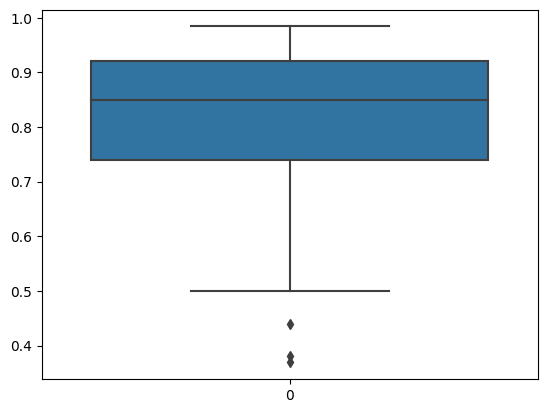

In [242]:
sns.boxplot(gpa_data["GPA_normalised"])

# Data Visualization

#### Univariate Analysis

<Axes: xlabel='GPA_normalised', ylabel='Count'>

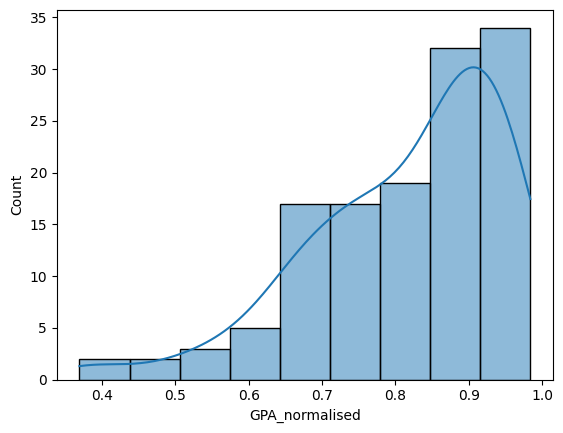

In [243]:
#plotting our target variable
sns.histplot(gpa_data, x="GPA_normalised", kde= True)

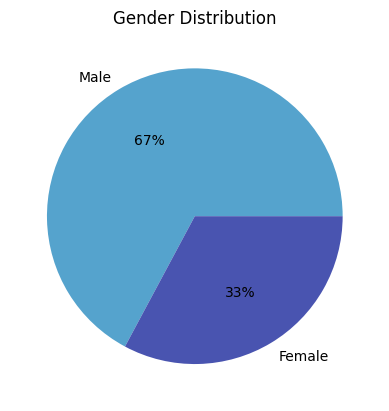

In [244]:
#plotting our gender distribution
gender = dict(gpa_data["gender"].value_counts())
palette = sns.color_palette("icefire")
plt.pie(gender.values(), labels = gender.keys(), autopct = "%.0f%%", colors =palette)
plt.title("Gender Distribution")
plt.show();

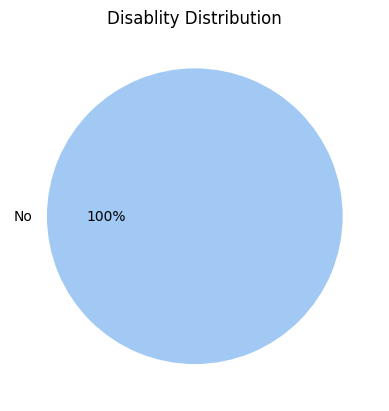

In [245]:
#plotting our gender distribution
disability = dict(gpa_data["has_disability"].value_counts())
palette = sns.color_palette("pastel")
plt.pie(disability.values(), labels = disability.keys(), autopct = "%.0f%%", colors =palette)
plt.title("Disablity Distribution")
plt.show();

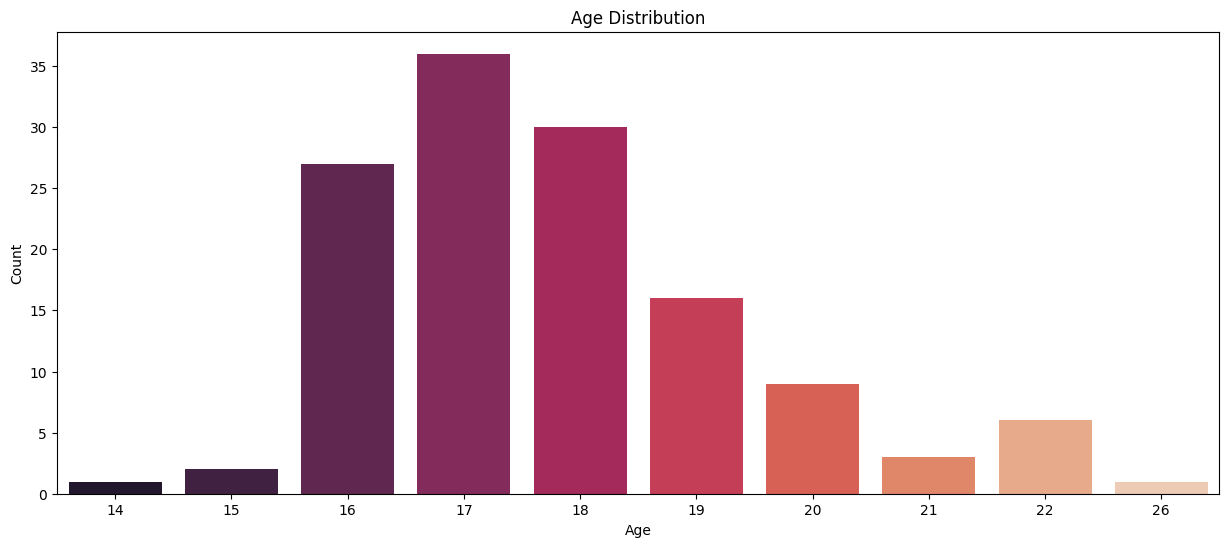

In [246]:
age = gpa_data["age_in_year_one"].value_counts().to_frame().reset_index()
plt.figure(figsize = (15,6))
sns.barplot(x= age["index"], y= age["age_in_year_one"], palette = "rocket")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show();

#### Bivariate Analysis

Text(0.5, 1.0, 'GPA vs Age')

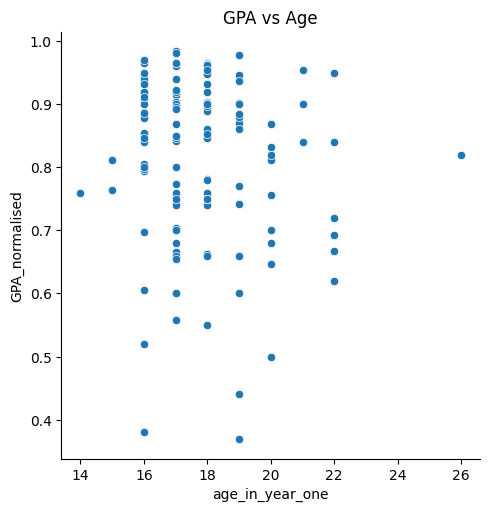

In [247]:
#gpa_normalised by age
sns.relplot(data=gpa_data, x="age_in_year_one", y="GPA_normalised")
plt.title("GPA vs Age")

Text(0.5, 1.0, 'GPA vs Teaching Rate')

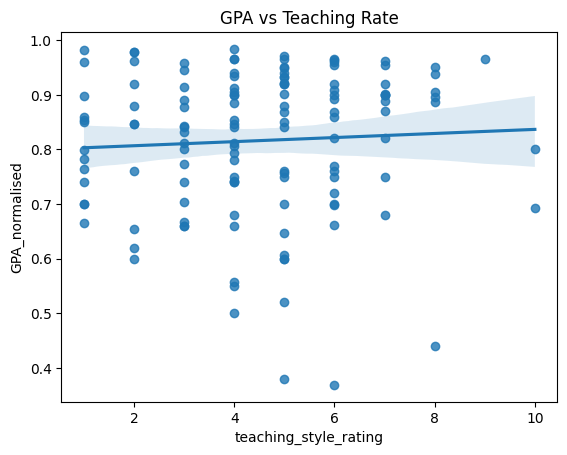

In [248]:
#GPA by teaching
sns.regplot(data=gpa_data, x="teaching_style_rating", y="GPA_normalised")
plt.title("GPA vs Teaching Rate")

Text(0.5, 1.0, 'GPA vs Gender')

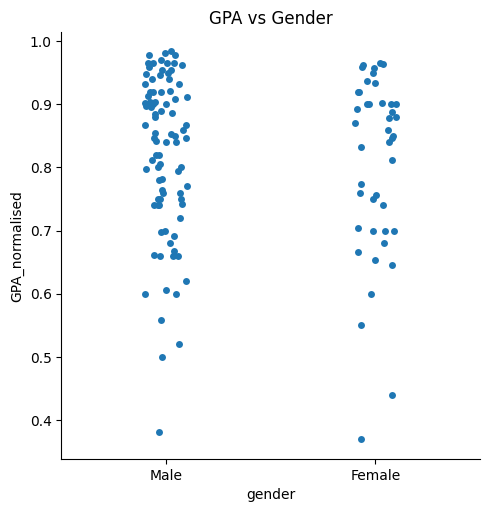

In [249]:
#gpa_normalised by gender
sns.catplot(data=gpa_data, x="gender", y="GPA_normalised")
plt.title("GPA vs Gender")

Text(0.5, 1.0, 'GPA vs Financial Status')

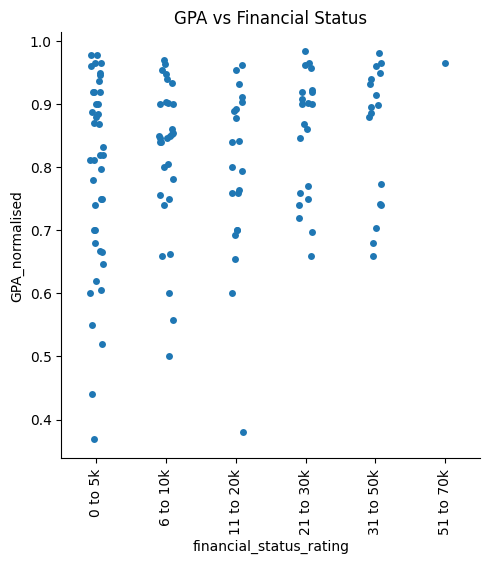

In [250]:
#gpa_normalised by financial_status
sns.catplot(data=gpa_data, x="financial_status_rating", y="GPA_normalised")
plt.xticks(rotation = 90)
plt.title("GPA vs Financial Status")

Text(0.5, 1.0, 'GPA vs Gender')

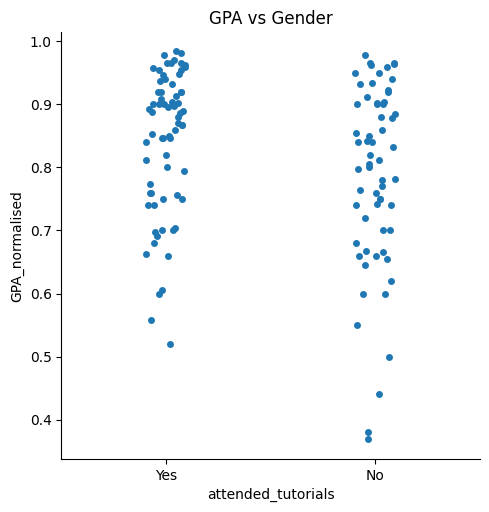

In [251]:
#gpa_normalised by tutorials
sns.catplot(data=gpa_data, x="attended_tutorials", y="GPA_normalised")
plt.title("GPA vs Gender")

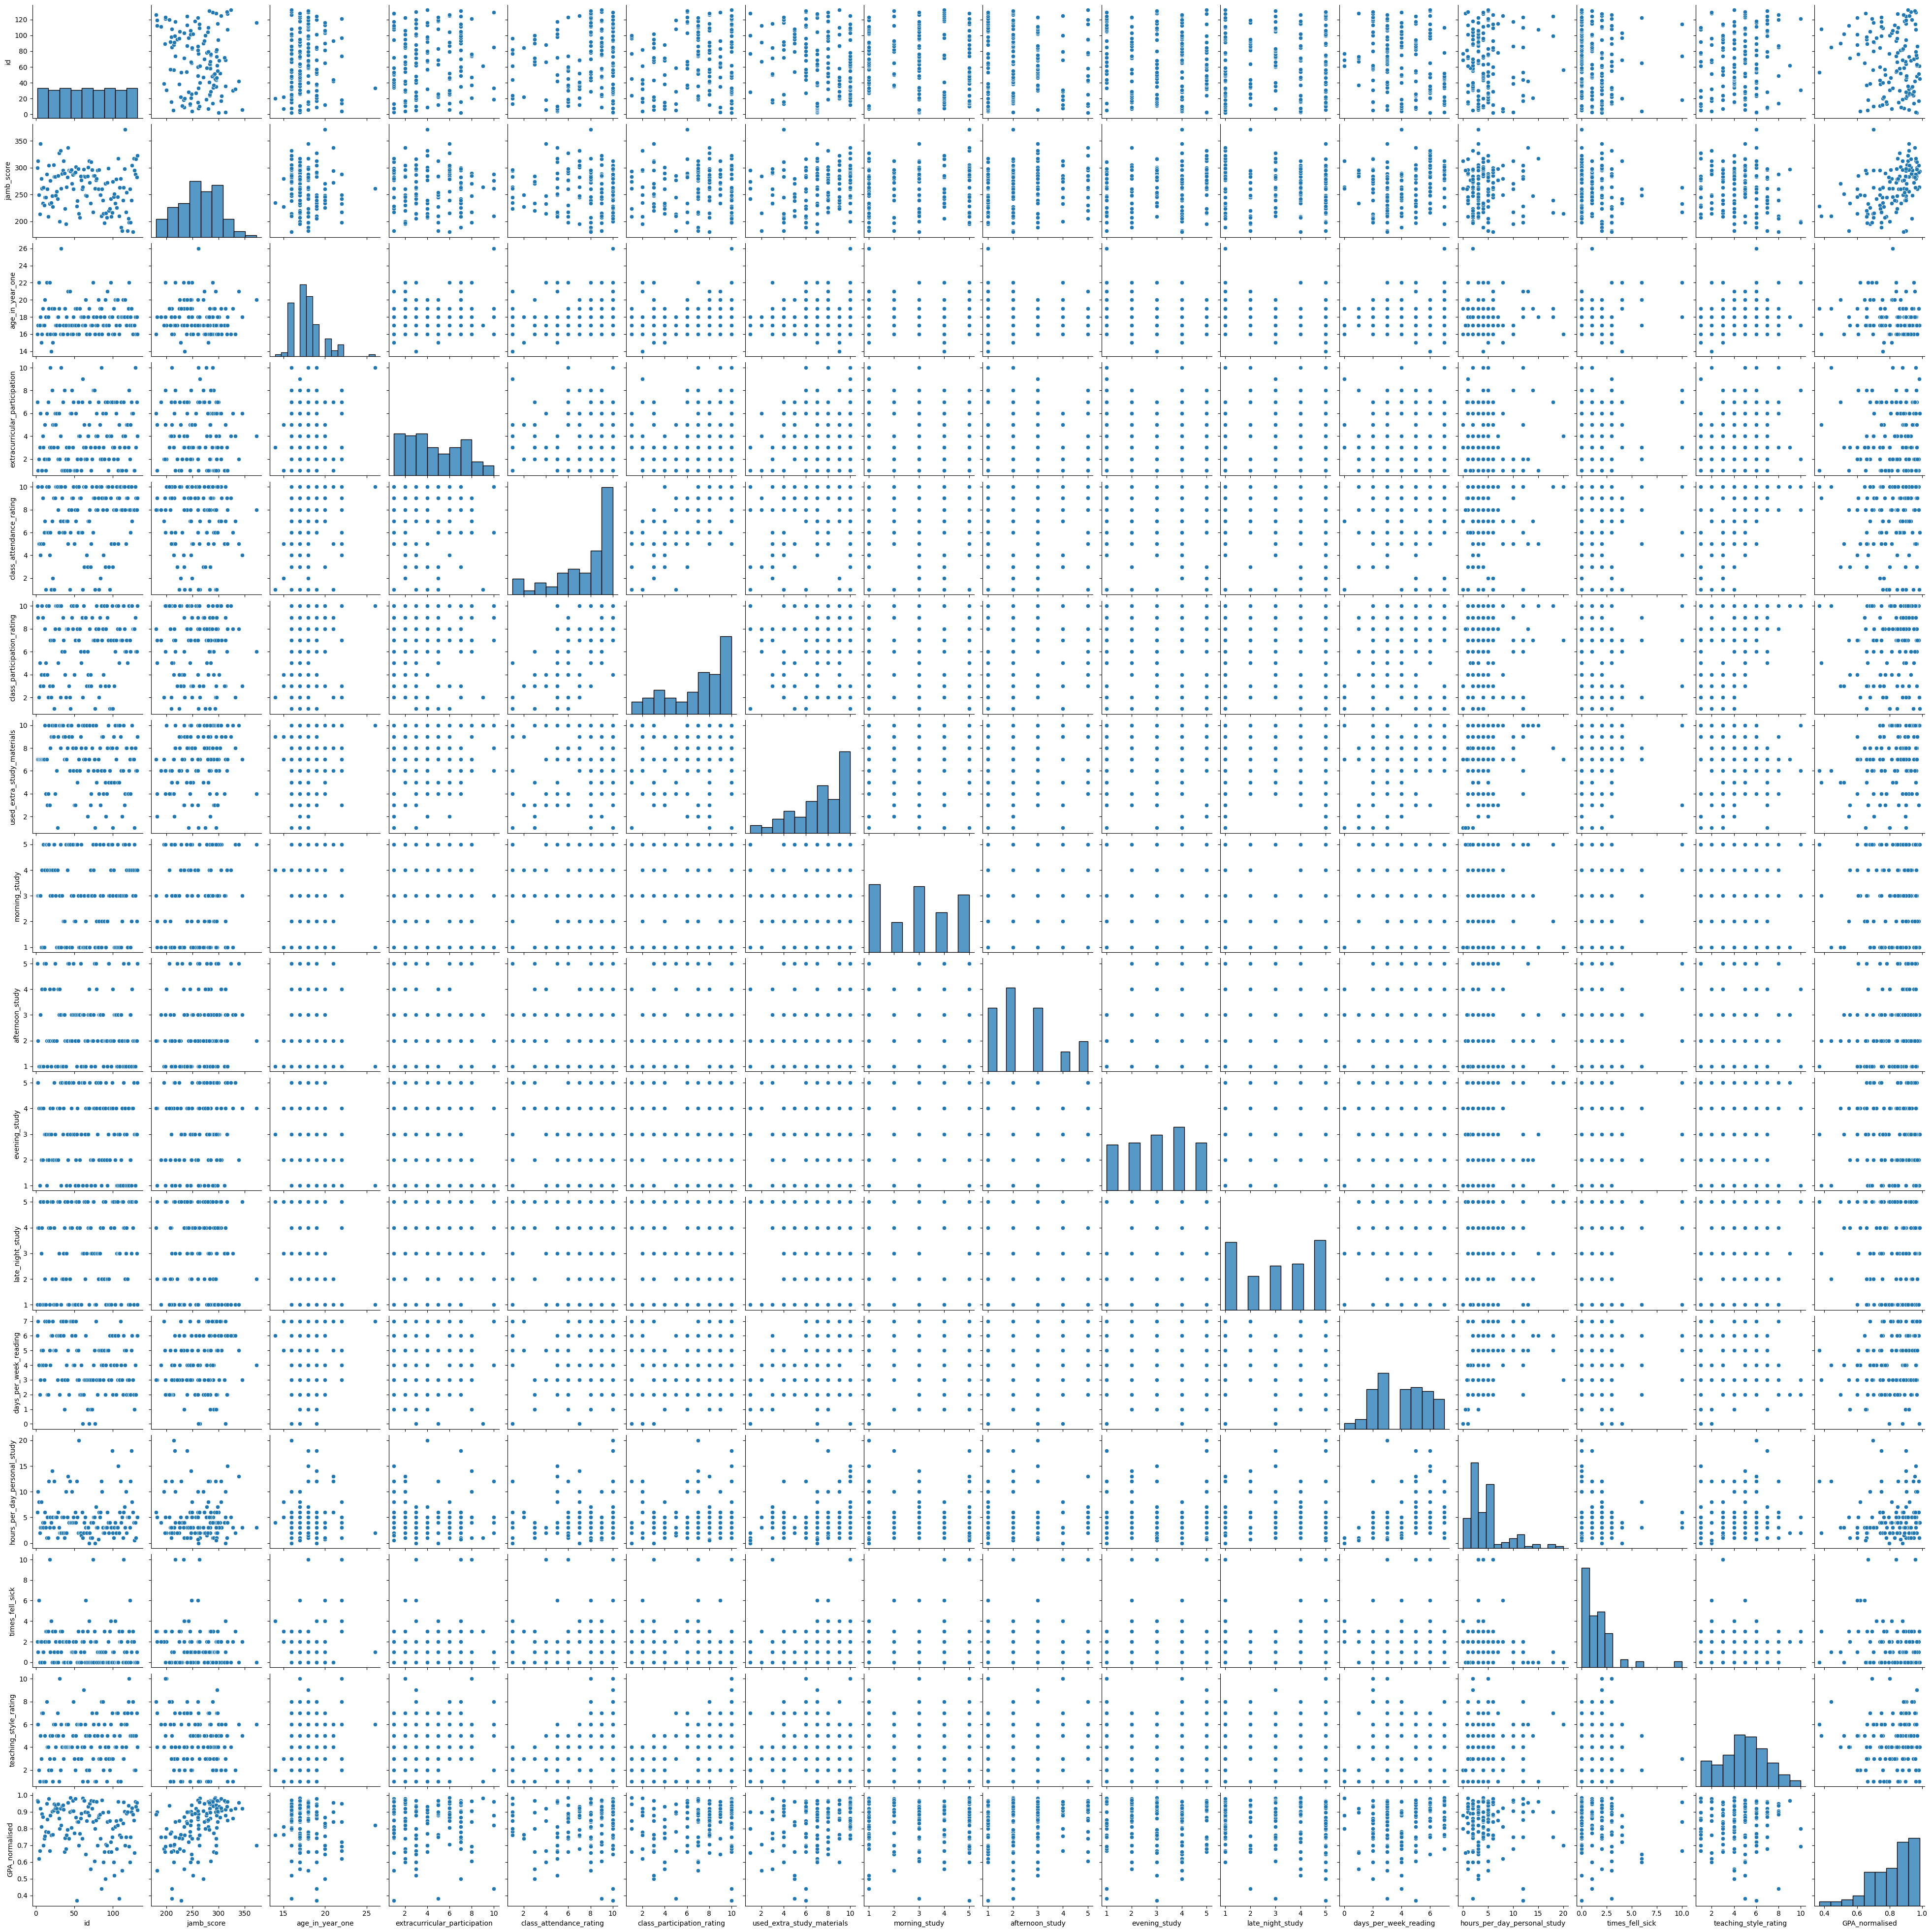

In [252]:
sns.pairplot(gpa_data);

#### Multivariate Analysis

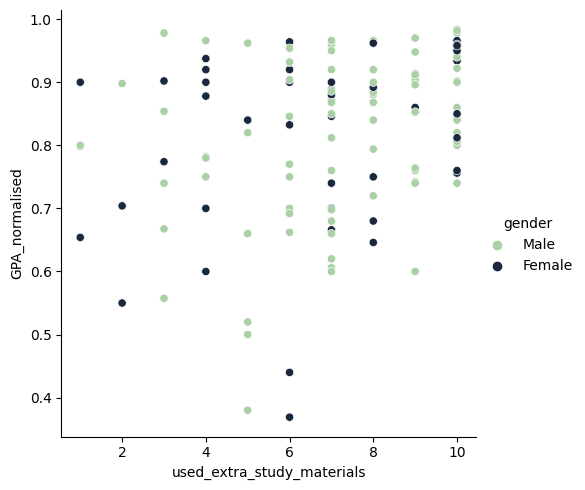

In [253]:
sns.relplot(
    data=gpa_data,
    x="used_extra_study_materials", y="GPA_normalised",
    hue="gender", palette="ch:r=-.5,l=.75"
)

In [254]:
fig = px.scatter_3d(
    gpa_data,
    x = 'extracurricular_participation',
    y = 'class_attendance_rating',
    z = 'GPA_normalised',
    color = 'gender',
    title = "3D Scatter Plot of Extracurricular_participation, Class_Attendance and GPA_normalised by Gender"
)
fig.show();

#### Data Preprocessing 2

In [255]:
# Ordinal encoding map
ordinal_encoding_map = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1, 'F': 0}

# Features to encode
features_to_encode = ['english', 'maths', 'subject_3', 'subject_4', 'subject_5']

# Apply ordinal encoding for the specified features
gpa_data[features_to_encode] = gpa_data[features_to_encode].apply(lambda col: col.map(ordinal_encoding_map))

# Perform label encoding for other categorical columns
categorical_columns = gpa_data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    gpa_data[col] = label_encoder.fit_transform(gpa_data[col])

gpa_data.head()

,id,jamb_score,english,maths,subject_3,subject_4,subject_5,age_in_year_one,gender,has_disability,attended_tutorials,extracurricular_participation,class_attendance_rating,class_participation_rating,used_extra_study_materials,morning_study,afternoon_study,evening_study,late_night_study,days_per_week_reading,hours_per_day_personal_study,taught_peers,courses_offered,times_fell_sick,study_mode,studied_original_course,financial_status_rating,teaching_style_rating,institution_type,GPA_normalised
0,2,300,4,5,5,4,4,16,1,0,1,7,10,10,7.0,3,5,5,1,6,6.0,3,2,2,0,1,0,6,1,0.966
1,3,313,4,5,5,5,4,17,1,0,0,1,10,9,7.0,3,2,5,4,7,10.0,3,1,1,0,1,0,6,1,0.960
2,4,249,3,4,4,4,3,22,1,0,0,2,5,2,7.0,3,1,4,4,4,8.0,1,4,6,0,0,0,2,1,0.620
3,5,213,3,4,4,3,4,17,0,0,0,3,5,5,7.0,3,1,1,1,2,2.0,1,2,0,0,0,0,1,2,0.666
4,6,345,3,5,5,5,5,18,1,0,1,6,4,3,7.0,3,3,4,5,3,3.0,3,0,2,0,1,0,5,1,0.920


### Mutual Information

In [256]:
from sklearn.metrics import mutual_info_score

def mutual_information_score(series):
    return mutual_info_score(series, gpa_data.GPA_normalised)

In [257]:
gpa_data[categorical_columns].apply(mutual_information_score).sort_values(ascending=False)

financial_status_rating    1.147128
courses_offered            1.031841
taught_peers               0.669372
institution_type           0.422250
studied_original_course    0.369253
attended_tutorials         0.355813
gender                     0.353928
study_mode                 0.240808
has_disability             0.000000
dtype: float64

### Correlation

<Axes: >

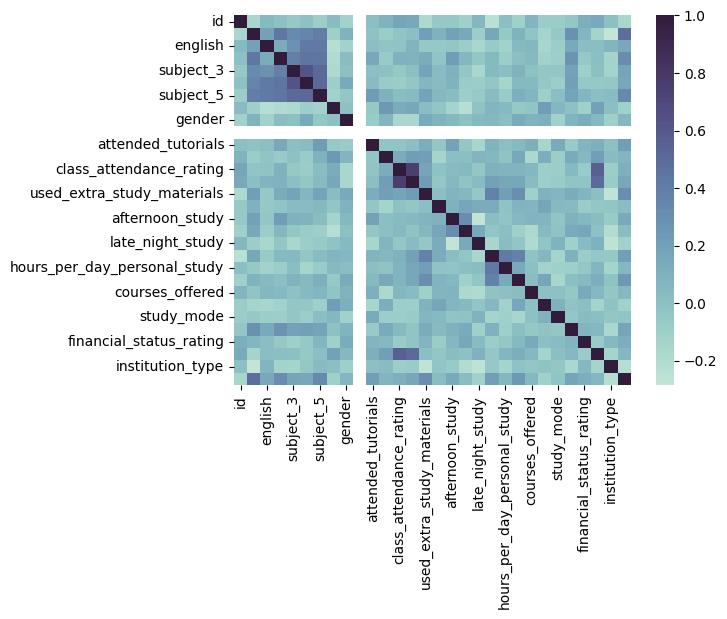

In [258]:
sns.heatmap(gpa_data.corr(numeric_only=True),cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))

## Machine Learning Modeling

In this section, we will walk through the steps involved in building and evaluating a machine learning model for our GPA prediction task.


### Train and Test Data

In [259]:
X = gpa_data.drop(['id', 'GPA_normalised'], axis=1)  # Features excluding 'id' and 'GPA_normal'
y = gpa_data['GPA_normalised']  # Target variable

#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
X_test.shape

(27, 28)

### Model Selection and Evaluation

In [264]:
#create a list of models
regressors = [
    LinearRegression(),
    GradientBoostingRegressor()
]

#model training and prediction
for model in regressors:
    #train the model
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start

    #predict on test data
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time() - start

    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print('Root Mean Squared Error (RMSE):', mean_squared_error(y_test, y_pred, squared=False))
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    print()

LinearRegression()
	Training time: 0.013s
	Prediction time: 0.002s
Root Mean Squared Error (RMSE): 0.13086871421383586

GradientBoostingRegressor()
	Training time: 0.126s
	Prediction time: 0.004s
Root Mean Squared Error (RMSE): 0.13233282998930715



### Hyperparameter Tuning for XGBoost

In [272]:
xgb = GradientBoostingRegressor()

#hyperparameter values to search
params ={
    'learning_rate' : [0.05,0.25,0.50,1],
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth': [3,6,9]
}

grid = GridSearchCV(estimator=xgb, param_grid=params)

#fitting the train data
grid.fit(X_train, y_train)

#getting the best estimator
best_model = grid.best_estimator_

#making predictions
y_pred = best_model.predict(X_test)

#evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Squared Error (RMSE):', rmse)


Root Mean Squared Error (RMSE): 0.10368460472685614


### Ensemble Learning

In [270]:
#initializing a Random Forest Regressor since it uses bagging (Bootstrap Aggregating)
model_2 = RandomForestRegressor()

# Train the model
model_2.fit(X_train, y_train)

# Predict on the test set
y_prediction = model_2.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_prediction, squared=False)
print('Root Mean Squared Error (RMSE):', rmse)


Root Mean Squared Error (RMSE): 0.11753012109006115


In [277]:
#hyperparameter tuning
params = {
    "n_estimators":[100,200,500],
    "max_depth": [3,6,9],
    "max_features": ['auto', 'sqrt', 'log2']
}
grid = GridSearchCV(estimator=model_2, param_grid=params)

#fitting the train data
grid.fit(X_train, y_train)

#getting the best estimator
best_model = grid.best_estimator_

#making predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_prediction, squared=False)
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.11753012109006115


In [274]:
# Initialize the Bagging Regressor model
bagged_model = BaggingRegressor(
    base_estimator = xgb,
    n_estimators = 100, #this is the number of subgroups to create and you can experiment with this number here
    #max_sample = 0.8, #using 80 percent of our dataset
    oob_score = True, #oob means out of bag
    random_state = 0
)

#Train the model
bagged_model.fit(X_train,y_train)

#get the oob score(optional)
oob_score = bagged_model.oob_score_
print("Out of the Bag Score:", oob_score)

#predict on the test set
y_preds = bagged_model.predict(X_test)

#Evaluate the model
rmse = mean_squared_error(y_test, y_preds, squared = False)
print("Root Mean Squared Error (RMSE):", rmse)

Out of the Bag Score: 0.1255587923645073
Root Mean Squared Error (RMSE): 0.10602325268079991


### Feature Importance Visualization

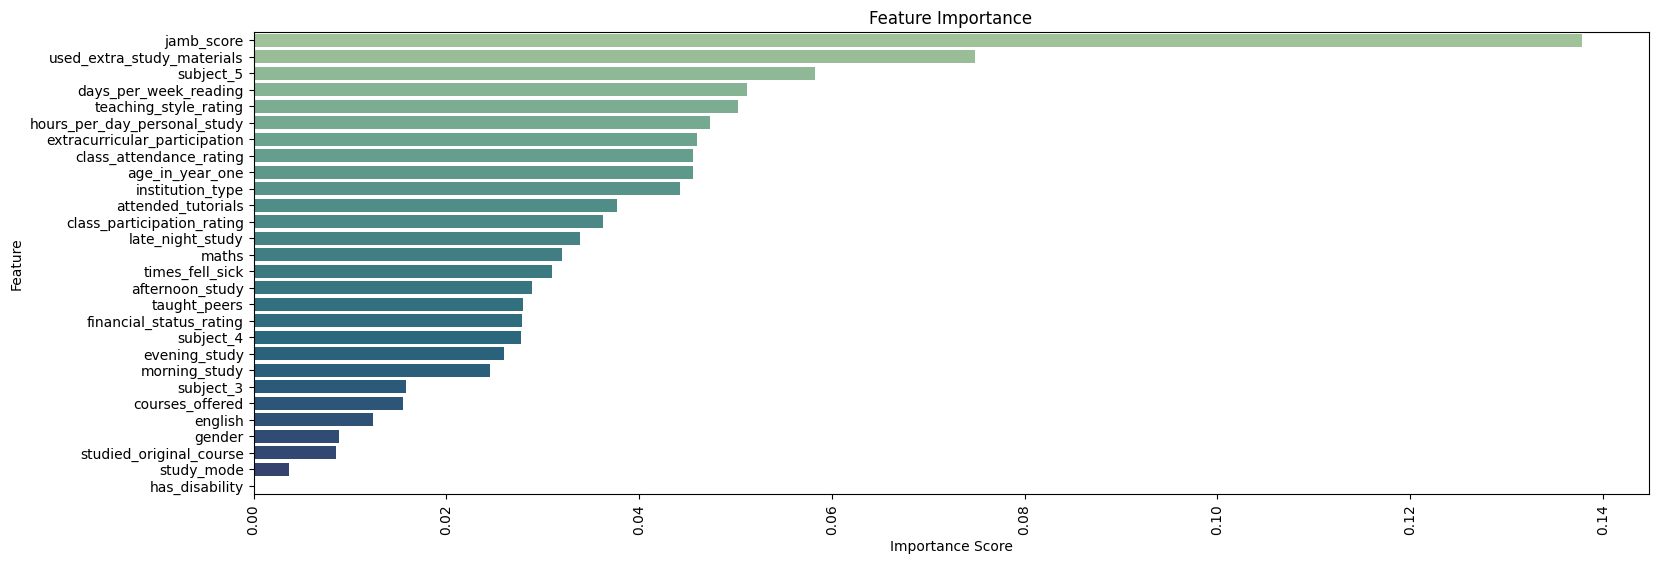

In [275]:
#depending on the model that performs well we get the feature importance (BAgging regressors don't have feature importance
#implemented
feature_importance = grid.best_estimator_.feature_importances_

# Create a DataFrame to associate feature names with their importance scores (assuming your features are named)
feature_names = list(X_train.columns)  # Replace with your feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(18, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette = "crest")
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.xticks(rotation = 90)
plt.ylabel('Feature')
plt.show()

### Save the model

In [ ]:
# Save the model to a file
model_filename = 'linear_regression_model.joblib'
joblib.dump(model, model_filename)

print('Model saved to', model_filename)

In [ ]:
#we can also save the bagged model to a file
model_filename = 'bagged_model.joblib'
joblib.dump(bagged_model, model_filename)

print('Model saved to', model_filename)


### Tips to Improve Model Performance

1. **Data Quality:**
   - Ensure clean, high-quality data without missing values or outliers.

2. **Feature Engineering:**
   - Create relevant and new features that capture essential patterns in the data.

3. **Model Selection:**
   - Choose appropriate models and tune hyperparameters for better performance.

4. **Ensemble Learning:**
   - Combine multiple models to improve accuracy and robustness.

5. **Regularization:**
   - Implement regularization to prevent overfitting.

7. **Domain Understanding:**
   - Understand the problem domain to make informed model decisions.

8. **Feedback Loop:**
   - Continuously iterate and improve the model based on feedback and new data.

---

## HAPPY HACKING!!


